In [2]:
# 先清空資料夾、多了評論數與標籤、變更圖片取名規則
# 圖片只會下載10張梗圖

# Load all URL images
import requests,os,glob
import json
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
s=0

ua = UserAgent()
user_agent = ua.random
headers = {'user-agent': user_agent}

url = 'https://www.dcard.tw/f/meme'
html = requests.get(url,headers=headers)
html.encoding="UTF-8"

sp = BeautifulSoup(html.text,'html.parser')
#建立images存圖片
images_dir="images/"
if not os.path.exists(images_dir):
    os.mkdir(images_dir)

pc_files = glob.glob(images_dir+'*.jpg')#刪除資料夾內的圖片
for pc_file in pc_files:
    try:
        os.remove(pc_file)
    except OSError as e:
        print(f"Error:{ e.strerror}")

all_links=sp.find_all('img')
for link in all_links:
#取 src 和 href 屬性内容
    if s==11:
        break
    src=link.get('src')
    href = link.get('href') #指定一個URL看連結要到哪
    attrs=[src,href]
    for attr in attrs:
#讀取 .jpg 和 .png檔
        if attr != None and ('.webp' in attr):
            full_path = attr
            filename= full_path.split('/')[-1]#取得圖檔名
            print(full_path)#儲存圖片
            if s!=0:
                try :
                    headers = {'user-agent':ua.random}
                    image = requests.get(full_path,headers=headers)
                    f = open(images_dir + str(s)+".jpg", "wb")
                    f.write(image.content)
                    f.close()
                    #print("我是",s)
                except:
                    print("{}無法讀取!".format(filename))
            s+=1
#以下使用api獲取按讚數
#參考https://marketingliveincode.com/?p=5009
alldata = []
last_article = ''
likeCount=[]
commentCount=[]
topics={}
url = 'https://www.dcard.tw/service/api/v2/forums/meme/posts?popular=true&limit=10'
for i in range(5):
    if i != 0: # 判斷是否是第一次執行
        request_url = url +'&before='+ str(last_article)
    else:
        request_url = url # 第一次執行，不須加上後方的before
    ua = UserAgent()
    headers = {'user-agent': ua.random}
    list_req = requests.get(request_url,headers=headers) # 請求
    #將整個網站的程式碼爬下來
    getdata = json.loads(list_req.content)
    alldata.extend(getdata) # 將另一個陣列插在最後面
    last_article = getdata[-1]['id'] # 取出最後一篇文章
    
for i in range(10):
    topicscount=len(alldata[i]['topics'])
    for j in range(topicscount):
        if alldata[i]['topics'][j] not in topics:
            topics[alldata[i]['topics'][j]]=[str(i)+".jpg"]
        else:
            topics[alldata[i]['topics'][j]].insert(-1,str(i)+".jpg")
with open("test.txt","w+",encoding="UTF-8-sig")as f:
    for i in range(10):
        likeCount.append(alldata[i]['likeCount'])
    for i in range(10):
        commentCount.append(alldata[i]['commentCount'])
    print("likeCount:",likeCount)
    print("commentCount:",commentCount)
    print("topics:",topics)
    f.write(str(likeCount)+"\n")
    f.write(str(commentCount)+"\n")
    f.write(str(topics))

https://megapx.dcard.tw/v1/images/926dcd27-8107-4745-a07f-3c07a4baa93d/encode/640.webp
https://megapx.dcard.tw/v1/images/e6c4f919-ead0-4f19-9ace-470914a5deba/encode/640.webp
https://megapx.dcard.tw/v1/images/555a8922-a9b7-4deb-8f06-9bfd0e6ad6c1/encode/640.webp
https://megapx.dcard.tw/v1/images/200be639-7079-47a2-b828-ac0343ae2b20/encode/640.webp
https://megapx.dcard.tw/v1/images/dcda7584-b1c0-4ba1-87a7-c80366cc3002/encode/640.webp
https://megapx.dcard.tw/v1/images/ba60aec9-c4cf-4ea0-88f4-7c7d54614ffe/encode/640.webp
https://megapx.dcard.tw/v1/images/bc788439-f49c-4651-949d-da9c0db44ebe/encode/640.webp
https://megapx.dcard.tw/v1/images/d1eb0cd7-af87-47b3-8af9-28ca5dcc8230/encode/640.webp
https://megapx.dcard.tw/v1/images/3dc22fca-5582-4caa-b152-cc5f4803c61c/encode/640.webp
https://megapx.dcard.tw/v1/images/c2f52057-427f-47d9-ae37-ccc3e8cb16cc/encode/640.webp
https://megapx.dcard.tw/v1/images/336ac5be-6105-4532-b26f-562face296f0/encode/640.webp
likeCount: [2010, 1404, 1354, 1291, 1168, 8

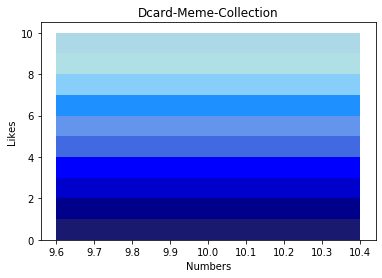

In [3]:
# test: 做出10個按照長度大小區分的長條圖
import matplotlib.pyplot as plt
import numpy as np

'''
x = np.random.randn(1000)    
plt.hist(x,bins=20,color='b')
    

plt.title("example")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


'''

num1 = 10
num2 = 9
num3 = 8
num4 = 7
num5 = 6
num6 = 5
num7 = 4
num8 = 3
num9 = 2
num10 = 1

likes = [num1,num2,num3,num4,num5,num6,num7,num8,num9,num10]  # 將喜愛數加入likes的陣列

for i in range(1,11):  # 將喜愛度從1-10排序
    numbers = i
    

# x = np.arange(len(numbers))  # 10
x = np.arange(10)  
plt.bar(numbers, likes, 
        color=['LightBlue',
               'PowderBlue', 
               'LightSkyBlue', 
               'DodgerBlue', 
               'CornflowerBlue', 
               'RoyalBlue', 
               'Blue', 
               'MediumBlue',
               'DarkBlue',
               'MidnightBlue'
               ])
# plt.xticks(numbers, likes)
plt.xlabel('Numbers')
plt.ylabel('Likes')
plt.title('Dcard-Meme-Collection')
plt.show()